Carolyn Massa Customer Churn Code - Springboard Capstone Project #1 - All Stages


# Step 1: Import Libraries in Python to Set up Shop.  I then perform Data Collection and Review by scanning in my 10,000 observation Dataset to Jupyter Notebook via python

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd #First I import the necessary libraries necessary to process my data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None
color = sns.color_palette()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

#Data Visualizations

from IPython.display import display
pd.options.display.max_columns = None
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.figure_factory as ff
import pandas_profiling as pp
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

from IPython import display
from ipywidgets import interact, widgets

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Importing Misc. Libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
import scipy.stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier



In [22]:
pd.read_csv('bank_churn.csv')#I read my data in using Pandas
code = pd.read_csv('bank_churn.csv')#I assign my dataframe under the name "code"
code.head(5)#I review the first 5 rows to check the data structure and the Column Titles


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
code.columns #review my variables.

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
code.columns.to_series().groupby(code.dtypes).groups #I need to discover which types of data I will work with

{dtype('int64'): Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
       dtype='object'),
 dtype('float64'): Index(['Balance', 'EstimatedSalary'], dtype='object'),
 dtype('O'): Index(['Surname', 'Geography', 'Gender'], dtype='object')}

Data Exploration and Cleaning - Here I review the types of data I have imported

In [6]:
code.shape #I want to see how many rows and columns of data I have; I see I have 10,000 rows and 14 columns

(10000, 14)

In [24]:
code.nunique()#I will check the count for each type of value

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
code.info() #I reviwed the types of data I have and investige if I have null values(values with no data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
code.isnull().sum() #I show a summary that there are 0 null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

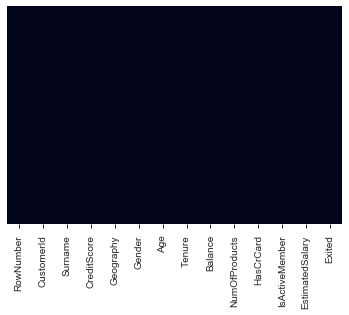

In [10]:
sns.heatmap(code.isnull(), yticklabels=False,cbar=False) #I check via a heatmap for a visual view that there are no ZERO VALUES

In [11]:
code.describe()#I check my date for outliers and see the oldest bank member is 92 and the average age is 38 years with the minimum age 18 years old


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
code.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1,inplace=True) #I want to drop columns that are irrelevant to my data research)

In [13]:
code.head(5) #I verify these columns have been dropped

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
code['Exited'].value_counts()#I review the actual "Churn" count by doing a "value count"

0    7963
1    2037
Name: Exited, dtype: int64

# Step 2: In this Section I perform Exploratory Data Analysis to check for trends

<function matplotlib.pyplot.show(*args, **kw)>

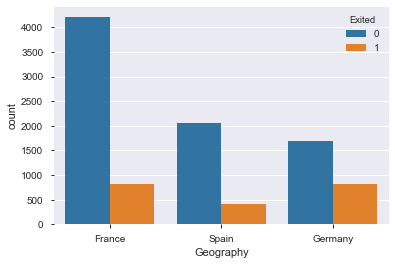

In [69]:
df = code[['Geography','Exited']]
sns.countplot(x='Geography', hue = 'Exited', data = df)
plt.show

In [52]:
code[code['Exited'] == 1].mean() #I seek to understand the averages for my variables who churn

RowNumber          4.905918e+03
CustomerId         1.569005e+07
CreditScore        6.453515e+02
Age                4.483800e+01
Tenure             4.932744e+00
Balance            9.110854e+04
NumOfProducts      1.475209e+00
HasCrCard          6.990673e-01
IsActiveMember     3.608247e-01
EstimatedSalary    1.014657e+05
Exited             1.000000e+00
frequency          1.000000e+02
dtype: float64

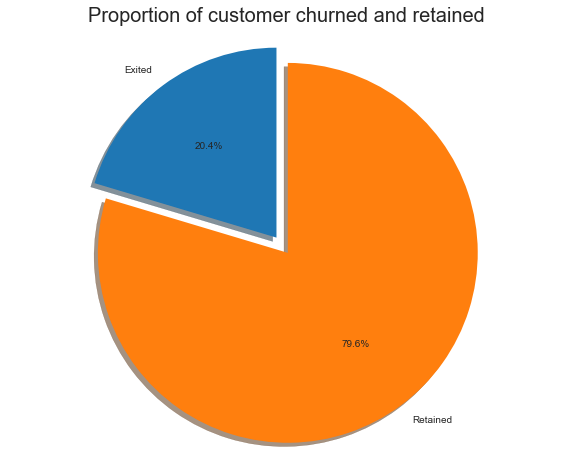

In [17]:
labels = 'Exited', 'Retained'#I want to visualize in a pie chart the proportion of churn vs. retained
sizes = [code.Exited[code['Exited']==1].count(), code.Exited[code['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

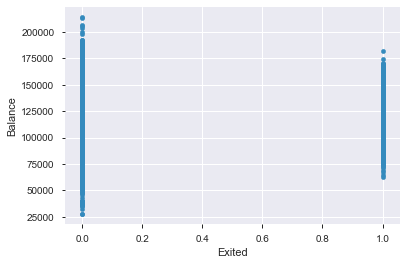

In [53]:
#here we see that of those who did Exit in German they had Balances between $60k and $175k
code.query('Geography == "Germany"').plot.scatter("Exited","Balance", )

In [ ]:
import matplotlib.pyplot as plt #Here I run a Person's R to see if any correlation to discover the highest correlation was age and bank balance
fig,axis = plt.subplots(figsize=(8,6))
axis = sns.heatmap(code.corr(method='pearson', min_periods  =1),annot=True,cmap="YlGnBu")

#Here I take a closer look at the dataset's 11 year Tenure and how it affects customer loss noticing that the highest count was in the 2nd year.

In [ ]:
import seaborn as sns 
code = pd.read_csv('bank_churn.csv')
sns.countplot(x='Tenure', hue = 'Exited', data = code)


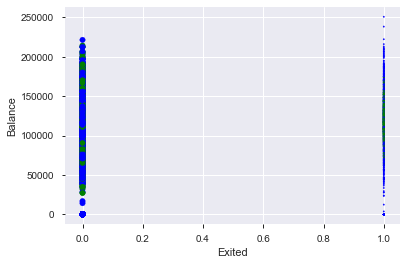

In [39]:
data = code.query('(Geography == "Germany") and (Geography == "France")')

size = np.where(code.Exited % 10 == 0,30,2)
color = np.where(code.Geography == 'Germany','green','blue')

code.plot.scatter("Exited", "Balance", logx=False, s=size, c=color)

In [85]:
#I create objects to use in my interactive map to display customer count by country
France = float(code[code['Geography']=='France']['Geography'].count())
Spain = float(code[code['Geography']=='Spain']['Geography'].count())
Germany = float(code[code['Geography']=='Germany']['Geography'].count())
print(France+Spain+Germany)
print(France)
print(Spain)
print(Germany)

10000.0
5014.0
2477.0
2509.0


In [45]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


data = dict(type='choropleth',
           locations=['FRA','ESP','DEU'],
           colorscale='RdYlBu',
           text = ['France','Spain','Germany'],
           z=[France,Spain,Germany],
           colorbar={'title':'number in each geography'})
layout = dict(title='Counting the numbers of each nationality',
              geo=dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data=[data],layout=layout)

In [48]:
#here I review a map according to customer count which is only 3 countries but can be useful if bank expands
iplot(choromap)

<function matplotlib.pyplot.show(*args, **kw)>

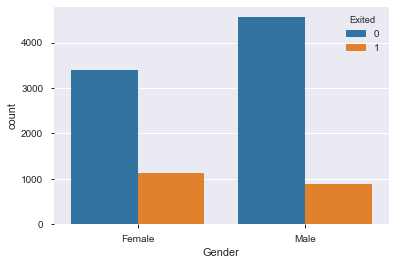

In [47]:
#We see here that more females have churned than males
sns.countplot(x='Gender', hue = 'Exited', data = code)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

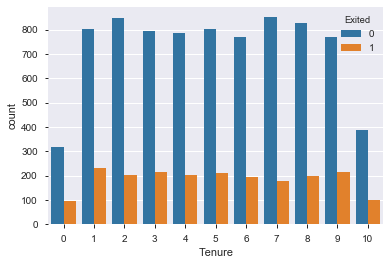

In [46]:
#Here I review the counts for Tenure and it looks like the highest churn rate was in the 2nd and 10th years of the clients tenure
sns.countplot(x='Tenure', hue = 'Exited', data = code)
plt.show

In [83]:

#here I wish to group the Ages to clearly define trends
bins = [ 18, 30, 40, 50, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
code['GroupedbyAge'] = pd.cut(code.Age, bins, labels = labels,include_lowest = True)
#code['GroupedbyAge'] = pd.cut(code['Age'], bins)
code.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,GroupedbyAge,frequency,%Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49,10,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49,10,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49,10,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39,10,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49,10,1


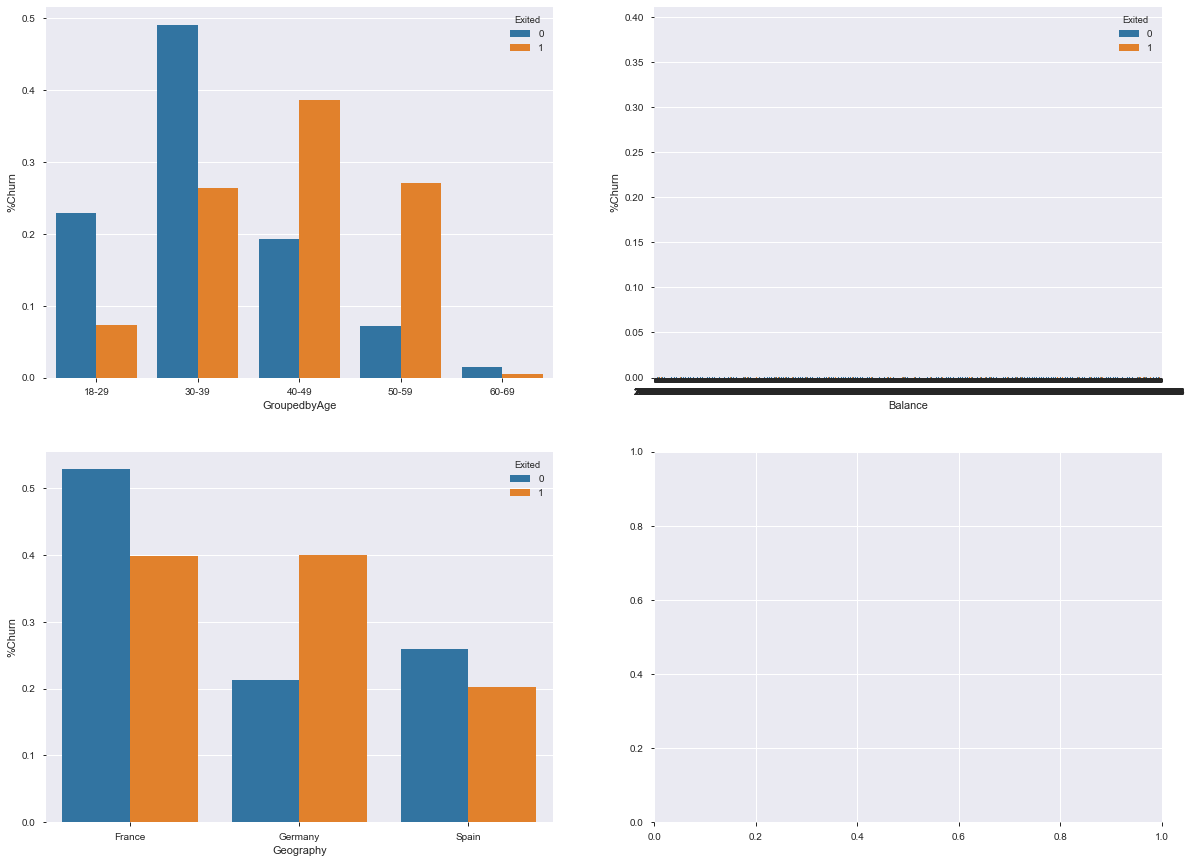

In [86]:
#Here I run three more barplots to check for trends

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

code['%Churn'] = 100 # a dummy column to refer to Exited count
for col, ax in zip(['GroupedbyAge', 'Balance', 'Geography'], axes.flatten()):
    counts = code.groupby([col, 'Exited']).count()
    freq_per_group = counts.div(counts.groupby('Exited').transform('sum')).reset_index()
    sns.barplot(x=col, y='%Churn', hue='Exited', data=freq_per_group, ax=ax)

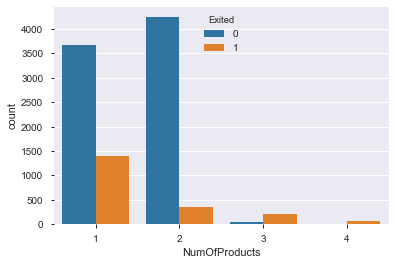

In [82]:

 #It is important to understand the number of products that each account holder had and how it can effect their status
sns.countplot(x='NumOfProducts', hue = 'Exited', data = code)


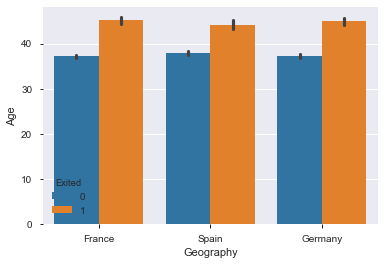

In [87]:
#Here I compare Geography to Age and who exited to check for patterns #I want to do counts for churn for all countries
sns.barplot(x='Geography', y = 'Age', hue = 'Exited', data = code)



In [ ]:
#Here I want to see how having a bank credit card affects the customer behavior and if having a credit card relating to the bank makes a difference in weather the customer leaves or not
sns.countplot(x='Exited', hue = 'HasCrCard', data = code) 

In [ ]:
#here I see, again age groupings by Churn
g = code.groupby(['Age', 'Exited']).size().reset_index(name='count') #I need to group the ages then plot them as % against churn like "the highest churn rate was those customers between 35 and 50 with a churn % of 28%, etc"
plt.bar(g['Age'],g['count'])
plt.xlabel('Age of Customers')
plt.ylabel('Customer Churn')

In [ ]:
g = code.groupby(['Age', 'Exited']).size().reset_index(name='count') #I need to group the ages then plot them as % against churn like "the highest churn rate was those customers between 35 and 50 with a churn % of 28%, etc"
plt.bar(g['Age'],g['count'])
plt.xlabel('Age of Customers')
plt.ylabel('Customer Churn')


In [ ]:
#Though I would like more detail on what "IsActive Member" actually means I check to see any correlations
sns.countplot(x='Exited', hue = 'IsActiveMember', data = code)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = code, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = code, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = code, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = code, ax=axarr[1][1])

In [84]:
np.sum(code['Geography'] == 'Germany') #searching how to count the #of Exits in Germany

GRM = (code["Geography"] == 'Germany').sum()


#Here I create box plots to examine relavent variables that can effect churn to look for insights such as I discover that those bank members with slightly higher bank balances churned more often. I also notice that those in higher age groups churned at a higher pace as well.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
code = pd.read_csv('bank_churn.csv')
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = code, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = code , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = code, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = code, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = code, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = code, ax=axarr[2][1])

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(12, start=.5, rot=-.85, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = code, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = code, ax=ax[1])

# Part 3 Data WranglingFeature Engineering - Here I introduce 3 new variables of those that correlate the most.

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_y = train_test_split(code,test_size=0.30,random_state=42)

train_x.shape


In [ ]:
code_train = train_x 
code_test = test_y 

code_train.shape
code_test.shape

In [ ]:
#Here I added in a new variable to show how bank clients with both a higher balance and salary had a slightly higher churn rate
code_train['BalanceSalaryRatio'] = code_train.Balance/code_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = code_train)
plt.ylim(-1, 5)

In [ ]:
#since Tenure is a function of Age this variable is meant to standardize Tenure over Age
code_train['TenureByAge'] = code_train.Tenure/(code_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = code_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
#I introduce a variable to show the credit score behavior versus age 
code_train['CreditScoreGivenAge'] = code_train.CreditScore/(code_train.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = code_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
#I now will change the variable for two variables from 0 (does not have Credit Card or does not have Product to a -1 to show the negative relationship)
code_train.loc[code_train.HasCrCard == 0, 'HasCrCard'] = -1
code_train.loc[code_train.IsActiveMember == 0, 'IsActiveMember'] = -1
code_train.head()


In [ ]:
code_train.head(5)

In [ ]:
#I create new object to organize by variables by continuous and categorical
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Gender', 'Geography']
code_train = code_train[['Exited'] + continuous_vars + cat_vars]
code_train.head()

In [ ]:
#Here I use Normalization to scale my continuous variables.
minVec = code_train[continuous_vars].min().copy()
maxVec = code_train[continuous_vars].max().copy()
code_train[continuous_vars] = (code_train[continuous_vars]-minVec)/(maxVec-minVec)
code_train.head()

In [ ]:
#  Here I hot encoded the categorical variables for easier distinguishment between Gender and countries since they need to BECOME categorical
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (code_train[i].dtype == np.str or code_train[i].dtype == np.object):
        for j in code_train[i].unique():
            code_train[i+'_'+j] = np.where(code_train[i] == j,1,-1)
        remove.append(i)
code_train = code_train.drop(remove, axis=1)
code_train.head()

In [ ]:
import numpy as np

# data prep pipeline for test data so I can transform the data from one representation to the other
#need to resolve the hot encoding issue to add that into my chain

def codePrepPipeline(code_predict,code_train_Cols,minVec,maxVec):
    # Add new features
    code_predict['BalanceSalaryRatio'] = code_predict.Balance/code_predict.EstimatedSalary
    code_predict['TenureByAge'] = code_predict.Tenure/(code_predict.Age - 18)
    code_predict['CreditScoreGivenAge'] = code_predict.CreditScore/(code_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    code_predict = code_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    code_predict.loc[code_predict.HasCrCard == 0, 'HasCrCard'] = -1
    code_predict.loc[code_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    #since this is not running I need to replace it with my ONEHOTENCODING code
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in code_predict[i].unique():
            code_predict[i+'_'+j] = np.where(code_predict[i] == j,1,-1)
        remove.append(i)
    code_predict = code_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(code_train_Cols) - set(code_predict.columns))
    for l in L:
        code_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    code_predict[continuous_vars] = (code_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    code_predict = code_predict[code_train_Cols]
    return code_predict


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction import DictVectorizer



In [ ]:
#I define how to display my scores 
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)


In [ ]:
import numpy as np 
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)
best_model(SVM_grid)

In [ ]:
#Logistic Regression with with degree 2 polynomial kernel using Train data
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)

In [ ]:
print(classification_report(code_test.Exited, log_primal.predict(code_test.loc[:, code_test.columns != 'Exited'])))

In [ ]:
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(code_train.loc[:, code_train.columns != 'Exited'],code_train.Exited)

In [ ]:
print(classification_report(code_train.Exited,  SVM_RBF.predict(code_train.loc[:, code_train.columns != 'Exited'])))

In [ ]:
#Review best model fit accuracy : My primary focus is on the performance in predicting 1's (Customers who churn)¶
print(classification_report(code_train.Exited,  RF.predict(code_train.loc[:, code_train.columns != 'Exited'])))

In [ ]:
#I run a comparison plot to compare the accuracies of my 3 models which the Random Forest performed better
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_log_primal, tpr_log_primal, label = 'Logistic Regression: ' + str(round(auc_RF, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

#Testing the 3 models for my test data set

In [ ]:
#Here I make the transistion from the Training data to testing data

#TRAIN TO TEST  = I need to remove my OHE before passing my CodePrepPipeline


code_test = codePrepPipeline(code_test,code_train.columns,minVec,maxVec)
code_test = code_test.mask(np.isinf(code_test))
code_test = code_test.dropna()
code_test.shape

In [ ]:
#Logistic Regression  using TEST DATA
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(code_test.loc[:, code_test
                             .columns != 'Exited'],code_test.Exited)

In [ ]:
print(classification_report(code_test.Exited, log_primal.predict(code_test.loc[:, code_test.columns != 'Exited'])))

In [ ]:
#Support Vector Model with RBF Kernal
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(code_test.loc[:, code_test.columns != 'Exited'],code_test.Exited)

In [ ]:
print(classification_report(code_test.Exited,  SVM_RBF.predict(code_test.loc[:, code_test.columns != 'Exited'])))

In [ ]:
#Random Forest

RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(code_test.loc[:, code_test.columns != 'Exited'],code_test.Exited)

In [ ]:
print(classification_report(code_test.Exited,  RF.predict(code_test.loc[:, code_test.columns != 'Exited'])))

In [ ]:
y = code_test.Exited
X = code_test.loc[:, code_test.columns != 'Exited']
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])

In [ ]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(code_test.Exited, RF.predict(code_test.loc[:, code_test.columns != 'Exited']),
                                                       RF.predict_proba(code_test.loc[:, code_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

# It is important to compare the 3 models to compare what worked best and we see that the Random Forest worked best for this particular problem.

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_log_primal, tpr_log_primal, label = 'Logistic Regression: ' + str(round(auc_log_primal, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()